In [24]:
from keras import models, layers
import numpy as np

In [25]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [27]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [28]:
train_images = np.astype(train_images, np.float32) / 255.0
train_images = train_images.reshape((60000, 28 * 28))

test_images = np.astype(test_images, np.float32) / 255.0
test_images = test_images.reshape((10000, 28 * 28))

In [29]:
from keras.utils import to_categorical
 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [39]:
result = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9999 - loss: 0.0012
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 6.6458e-04
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 4.8982e-04
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 3.9103e-04
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 3.3443e-04


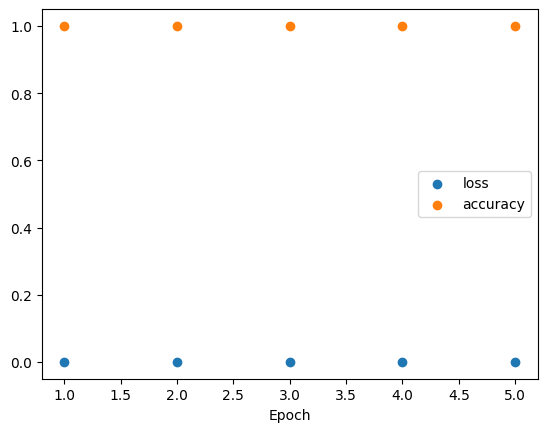

In [42]:
from matplotlib import pyplot as plt

# plot training history
plt.scatter(range(1, 6), result.history['loss'], label='loss')
plt.scatter(range(1, 6), result.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.legend()

In [31]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
 
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0708
test_acc: 0.9764000177383423


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


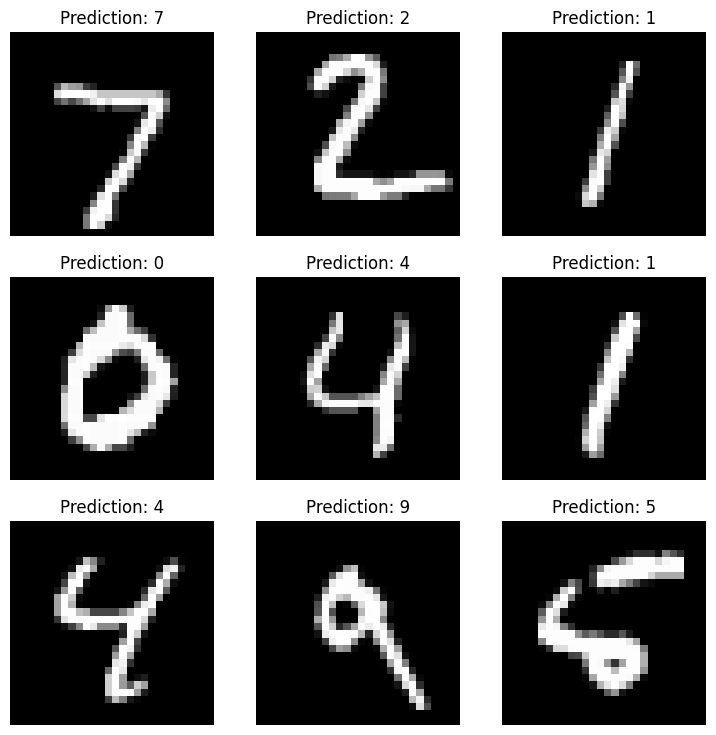

In [33]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(9, 9))

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(test_images[i * 3 + j].reshape(28, 28), cmap='gray')
        prediction = np.argmax(network.predict(test_images[i * 3 + j].reshape(1, 28 * 28)))
        ax[i, j].set_title(f'Prediction: {prediction}')
        ax[i, j].axis('off')